In [1]:
import lyricsgenius as lg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spotipy
import time

from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from spotipy.oauth2 import SpotifyClientCredentials
from requests.exceptions import Timeout



In [2]:
# artists = ['Logic', 'Rihanna', 'Frank Sinatra']


# def get_lyrics(arr, k):  # Write lyrics of k songs by each artist in arr
#     c = 0  # Counter
#     for name in arr:
#         try:
#             songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
#             s = [song.lyrics for song in songs]
#             print("\n \n   <|endoftext|>   \n \n".join(s))  # Deliminator
#             c += 1
#             print(f"Songs grabbed:{len(s)}")
#         except:  #  Broad catch which will give us the name of artist and song that threw the exception
#             print(f"some exception at {name}: {c}")



In [3]:
all_top_songs = pd.read_excel('data/top_10000_songs_201129.xlsx', index_col=0) 

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
year_dis_song = all_top_songs.groupby('Year')['Song'].count()

In [5]:
cur_songs_start = 5000
cur_songs_end = 6000
current_songs = all_top_songs[cur_songs_start:cur_songs_end]

In [6]:
current_songs

,PLACE,Artist,Song,Year,PLACE08,PLACE11,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
ID,,,,,,,,,,,
1847,5001,The Rolling Stones,Emotional Rescue,1980,2860.0,NaN,NaN,NaN,NaN,4154.0,4189.0
6293,5002,Erasure,A Little Respect,1988,NaN,NaN,NaN,4451.0,4839.0,4941.0,5026.0
13519,5003,"Jim Europe's 369th Infantry ""Hellfighters"" Band",Memphis Blues,1919,NaN,NaN,NaN,NaN,NaN,6579.0,6669.0
5404,5004,Belle and Sebastian,"Step into My Office, Baby",2003,NaN,NaN,NaN,5844.0,NaN,4578.0,4647.0
5999,5005,Death Cab for Cutie,Soul Meets Body,2005,NaN,NaN,NaN,2824.0,3451.0,4606.0,4715.0
...,...,...,...,...,...,...,...,...,...,...,...
16589,5996,Amen Dunes,Believe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4541,5997,Badfinger,Without You,1970,NaN,NaN,2456.0,4295.0,NaN,6171.0,6235.0
6548,5998,Gerry and The Pacemakers,How Do You Do It?,1963,NaN,NaN,NaN,5331.0,3976.0,5981.0,6044.0


In [8]:
all_top_albums = pd.read_excel('data/top_3000_albums_201129.xls', index_col=0) 

In [9]:
year_dis_album = all_top_albums.groupby('Year')['Album'].count()

In [57]:

cur_album_start = 336
cur_album_end = 600
current_albums = all_top_albums[cur_album_start:cur_album_end]

In [58]:
current_albums

,PLACE,Artist,Album,Year,PLACE08,PLACE09,PLACE10,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
i,,,,,,,,,,,,
257,337.0,Deep Purple,Machine Head,1972,242.0,241.0,254.0,251.0,296.0,263.0,284.0,281.0
278,338.0,Al Green,Call Me,1973,255.0,268.0,290.0,264.0,294.0,313.0,331.0,325.0
5191,339.0,Fiona Apple,The Idler Wheel…,2012,NaN,NaN,NaN,630.0,579.0,555.0,509.0,560.0
1069,340.0,Moby,Play,1999,264.0,299.0,333.0,366.0,331.0,316.0,334.0,328.0
425,341.0,The Jam,All Mod Cons,1978,219.0,219.0,227.0,226.0,246.0,264.0,309.0,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6207,496.0,Angel Olsen,All Mirrors,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,497.0,Black Sabbath,Black Sabbath,1970,442.0,432.0,461.0,454.0,488.0,416.0,475.0,475.0
1103,498.0,Ryan Adams,Heartbreaker,2000,552.0,503.0,420.0,491.0,448.0,455.0,460.0,485.0


In [37]:
#Look at distribution of songs/albums over the years

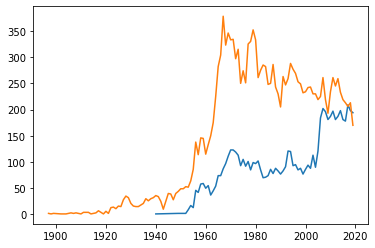

In [38]:
plt.plot(year_dis_album)
plt.plot(year_dis_song)
#orange = songs
#blue = albums

In [39]:
PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    

In [40]:
def make_dictionaries(parent, fileName):
    assert parent in PARENT_GENRES, "The passed name should be a in PARENT_GENRES"
    
    return_dict = {}
        
    f = open(fileName, "r")
    for line in f:
        if line.strip() != "Explore" and line.strip() !="\n" and line.strip() != "":
      
            child_genre = line.strip().lower()
            return_dict[child_genre] = parent
       
            
    return return_dict

        

In [41]:
pop_dict = make_dictionaries("pop", "./data/pop_children.txt")
rock_dict = make_dictionaries("rock", "./data/rock_children.txt")
hip_hop_dict = make_dictionaries("hip hop", "./data/hip_hop_children.txt")
blues_dict = make_dictionaries("blues", "./data/blues_children.txt")
classical_dict = make_dictionaries("classical", "./data/classical_children.txt")
easy_listening_dict = make_dictionaries("easy listening", "./data/easy_listening_children.txt")
edm_dict = make_dictionaries("edm", "./data/edm_children.txt")
folk_dict = make_dictionaries("folk", "./data/folk_children.txt")
jazz_dict = make_dictionaries("jazz", "./data/jazz_children.txt")
latin_dict = make_dictionaries("latin", "./data/latin_children.txt")
metal_dict = make_dictionaries("metal", "./data/metal_children.txt")
new_age_dict = make_dictionaries("new age", "./data/new_age_children.txt")
r_n_b_dict = make_dictionaries("r&b", "./data/r&b_children.txt")
country_dict = make_dictionaries("country", "./data/country_children.txt")
world_dict = make_dictionaries("world", "./data/world_children.txt")

all_genres_dict = {**pop_dict,**rock_dict, **hip_hop_dict, **blues_dict, **classical_dict, 
                   **easy_listening_dict, **edm_dict, **folk_dict, **jazz_dict, **latin_dict,
                  **metal_dict, **new_age_dict, **r_n_b_dict, **country_dict, **world_dict}

In [42]:
def getArtistGenre(genres):
    '''
    This takes a list of possible genres for an artist from the spotify API
    ex. ['adult standards', 'brill building pop', 'easy listening', 'lounge']
    If a parent genre is in the list it will return that as the genre
    Otherwise it will loop through the genres, and analyze the children genres
    The majority parent genre of the children genre will determine the returned genre
    ex. if 5 of 7 genres parent genre is rock, rock will be returned
    '''
    PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    
    returnGenre = ""
    
    #First check to see if a parent genre in list of spotify genres
    num_parents_in_genres = 0
    for g in genres:
        if g in PARENT_GENRES:
            returnGenre = g
            num_parents_in_genres+=1
            
    # Edge case two parent genres in a list (['dance pop', 'edm', 'pop', 'pop dance', 'pop rap'])
    # 1: count all of them and return the parent genre with most child genre
    
    if num_parents_in_genres == 1: #If only one parent genre included, return it
        return returnGenre
        
    #If a parent genre didn't show up OR more than one showed up count all genres
    genre_counts = {'pop':0, 
                    'rock':0, 
                    'hip hop':0, 
                    'latin': 0,
                    'edm': 0,
                    'r&b': 0,
                    'country': 0,
                    'folk': 0,
                    'classical': 0,
                    'metal': 0,
                    'jazz': 0,
                    'new age': 0,
                    'blues': 0,
                    'world': 0,
                    'easy listening': 0}
    
    
    for g in genres:
        try:
            parent = all_genres_dict[g]
            genre_counts[parent]+=1
        except:
            pass
        
    #TODO do we need to think about ties?
    max_genre = "no genre"
    max_genre_count = 0
    for p in PARENT_GENRES:
        if genre_counts[p] > max_genre_count:
            max_genre = p
            max_genre_count = genre_counts[p]
            
    returnGenre = max_genre
           
   
    return returnGenre
    
    

In [43]:
def getMostPopWord(lyrics):
    """
    Gets Called in count lyrics
    """

    text_tokens = word_tokenize(lyrics)
    lyrics_without_sw = [word for word in text_tokens if not word in stopwords.words()]
#     print(lyrics_without_sw)
    
    #I tried this. It seems to have some issues. For example, it converts 'us' to 'u'
    #This may not be the best option to get the most common words if the words aren't clearly recognizable
    
#     #Lemmatize the lyrics 
#     lmtzr = WordNetLemmatizer()
#     lem_lyrics = [[lmtzr.lemmatize(word) for word in word_tokenize(s)]
#               for s in lyrics_without_sw]
    
#     lem_lyrics_flat = []
#     for sublist in lem_lyrics:
#         lem_lyrics_flat.extend(sublist)
    
#     print(lem_lyrics_flat)
    
    c = Counter(lyrics_without_sw)
    return c.most_common(10)


def countLyrics(lyrics):
    """
    Takes in the output of 
    "\n \n   <|endoftext|>   \n \n".join([song.lyrics]))
    The first line is always the name of the song and the word lyrics
    There is always a number followed by embed on the last string
    Gets num lyrics, num unique lyrics, and specific word counts
    """
    
    #Remove the first line that has the title of the song and the word 'lyrics'
    split = lyrics.split("\n")
    del split[0]
    lyrics = "\n".join(split)
    
    pattern = r'\d*Embed'
    lyrics = re.sub(pattern, '', lyrics )
    
    pattern = r'You might also like'
    lyrics = re.sub(pattern, '', lyrics )

    
    #Convert to lower and remove non-alphnumeric chars
    lyrics = lyrics.lower()
    lyrics = re.sub(r'\W+', ' ', lyrics)   
    most_common_words = getMostPopWord(lyrics)
    
        
    #Parse most common words
    #get most common words (cw) and common word counts (cwc)
    try:
        cw1 = most_common_words[0][0]
        cw1c = most_common_words[0][1]
    except:
        cw1 = "NA"
        cw1c = 0
    
    try:
        cw2 = most_common_words[1][0]
        cw2c = most_common_words[1][1]
    except:
        cw2 = "NA"
        cw2c = 0
    
    try:
        cw3 = most_common_words[2][0]
        cw3c = most_common_words[2][1]
    except:
        cw3 = "NA"
        cw3c = 0
    
    try:
        cw4 = most_common_words[3][0]
        cw4c = most_common_words[3][1]
    except:
        cw4 = "NA"
        cw4c = 0
    
    try:
        cw5 = most_common_words[4][0]
        cw5c = most_common_words[4][1]
    except:
        cw5 = "NA"
        cw5c = 0
    
    try:
        cw6 = most_common_words[5][0]
        cw6c = most_common_words[5][1]
    except:
        cw6 = "NA"
        cw6c = 0
    
    try:
        cw7 = most_common_words[6][0]
        cw7c = most_common_words[6][1]
    except:
        cw7 = "NA"
        cw7c = 0
    
    try:
        cw8 = most_common_words[7][0]
        cw8c = most_common_words[7][1]
    except:
        cw8 = "NA"
        cw8c = 0
    
    try:
        cw9 = most_common_words[8][0]
        cw9c = most_common_words[8][1]
    except:
        cw9 = "NA"
        cw9c = 0
    
    try:
        cw10 = most_common_words[9][0]
        cw10c = most_common_words[9][1]
    except:
        cw10 = "NA"
        cw10c = 0
    

    #Count number of total lyrics and unique lyrics
    allWords = lyrics.split()
    num_unique = len(np.unique(allWords))
    total_words = len(allWords)
    

    #pattern matching
    
    #***************
    # LOVE
    #***************
    love_pattern = 'lov(e|ing|er|es|ely|ed)\\b'
    love_words = len(re.findall(love_pattern, lyrics))
    
    #***************
    # GOD
    #***************
    god_pattern = 'go(d|ds|ddes)\\b|jesus\\b|christ\\b'
    god_words = len(re.findall(god_pattern, lyrics))
    
    #***************
    # DANCE
    #***************
    dance_pattern = 'danc(e|es|ing|er)\\b'
    dance_words = len(re.findall(dance_pattern, lyrics))
    
    #***************
    # COOL
    #***************
    cool_pattern = 'coo(l|ler|lest)\\b'
    cool_words = len(re.findall(cool_pattern, lyrics))
    
    #***************
    # ROCK
    #***************
    rock_pattern = 'roc(k|ked|kers|ks|ker|king)\\b'
    rock_words = len(re.findall(rock_pattern, lyrics))
    
    #***************
    # SWEAR
    #***************
    swear_pattern = 'dam(n|ns|ned)\\b|fuc(k|ks|ked|ker|kers|king|kin)\\b|shi(t|ty|ts|ting|ter)\\b|hel(l|ls)\\b|bitc(h|hes|hen)\\b|bastar(d|ds)|as(s|es|shole|sholes)\\b'
    swear_words = len(re.findall(swear_pattern, lyrics))
    
    #***************
    # FAMILY
    #***************
    family_pattern = 'fa(m|mily|milies|)\\b|br(o|other|others)\\b|sis(ter|ters)\\b|so(n|ns)\\b|daugh(ter|ters)\\b|husban(d|ds)|wi(fe|ves)\\b|cousi(n|ns)\\b|uncl(e|es)\\b|aun(t|ts|ties)\\b'
    family_words = len(re.findall(family_pattern, lyrics))
    
    #***************
    # BABY
    #***************
    baby_pattern = 'ba(e|be|by|bies)\\b'
    baby_words = len(re.findall(baby_pattern, lyrics))
 

    #***************
    # MONEY
    #***************
    money_pattern = 'money\\b|cash\\b|doll(er|ers|a|az)\\b|buc(k|ks)\\b|coi(n|ns)\\b|bil(l|ls|lz)\\b'
    money_words = len(re.findall(money_pattern, lyrics))
    
    #***************
    # FUNKY
    #***************
    funky_pattern = 'fun(k|ky)\\b'
    funky_words = len(re.findall(funky_pattern, lyrics))
    
    #***************
    # CHILL
    #***************
    chill_pattern = 'chil(l|ls)\\b'
    chill_words = len(re.findall(chill_pattern, lyrics))
    
    
    
    
    
    return num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words,swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c
    
    
    

In [44]:
#Set up genius API
genius = lg.Genius('cPaJbcaz-llZE_G6jO_bHtcPFyJps_aiwumM5pF_xoPIBkmXHifU6lhHcOcbwOlY',  # Client access token from Genius Client API page
                             skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"],
                             remove_section_headers=True, verbose = True,
                             timeout=15, sleep_time=5, retries = 2)

# genius.sleep_time = 45


In [45]:
#Set up spotify API
cid = '2d2d4ac665f543db93244d6799fc01bc'
secret = '43cd8ad30758405fa3291b1b45e944fd'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [46]:
album_num=0
csv_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ ".csv"
csv_fail_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ "_fail.csv"

#csv of failed songs
l = open("./input_data/"+csv_fail_name, "w+")
header = "album|track|artist|year|id|reasonFail\n"
l.write(header)

#csv of completed songs
f = open("./input_data/"+csv_name, "w+")
header = "song|artist|year|genre|numUnique|totalWords|love_words|god_words|dance_words|cool_words|rock_words|swear_words|family_words|baby_words|money_words|funky_words|chill_words|cw1|cwc1|cw2|cwc2|cw3|cwc3|cw4|cwc4|cw5|cwc5|cw6|cwc6|cw7|cwc7|cw8|cwc8|cw9|cwc9|cw10|cwc10\n"
f.write(header)

#Write a row for each song 
for index, row in current_albums.iterrows():
    
    album_num+=1
    cur_artist = row['Artist']
    cur_album = row['Album']
    cur_year = row['Year']
    cur_id = index
    print(f"ID: {cur_id}\nAlbum: {cur_album}\nArtist: {cur_artist}\n______________")


    
    #Genius api
    #Get num word, num unique, specific word counts etc.
    retries = 0
    while retries < 3:
        try:
            
            
            #Use genius API 
            print(f"Getting album. Attempt number {retries}")
            album = genius.search_album(cur_album, cur_artist)
            print("Got album")
        
            #Spotify api
            #Get Genre
            print(f"Getting genre list. Attempt number {retries}")
            results = sp.search(q=cur_artist, type='artist')
            items = results['artists']['items']
            print("Got genre list")
            
            if len(items) > 0:
                cur_artist_genre = getArtistGenre(items[0]['genres'])
            else:
                cur_artist_genre = "no genre"
                
            print(f"Got parent genre: {cur_artist_genre}")
            track = 0
            print("Looping tracks")
            for i in album.tracks:
                track +=1
                cur_lyrics = i.song.lyrics
                
                if len(cur_lyrics.split()) > 15:                    
                    num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words, swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c= countLyrics(cur_lyrics)
                    #If everything works. Write the line to the file
                    line = f"{cur_album}|{cur_artist}|{cur_year}|{cur_artist_genre}|{num_unique}|{total_words}|{love_words}|{god_words}|{dance_words}|{cool_words}|{rock_words}|{swear_words}|{family_words}|{baby_words}|{money_words}|{funky_words}|{chill_words}|{cw1}|{cw1c}|{cw2}|{cw2c}|{cw3}|{cw3c}|{cw4}|{cw4c}|{cw5}|{cw5c}|{cw6}|{cw6c}|{cw7}|{cw7c}|{cw8}|{cw8c}|{cw9}|{cw9c}|{cw10}|{cw10c}\n"
                    f.write(line)
                    
                else:
                    line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|too_few_lyrics\n"
                    l.write(line)
                    

        except Timeout as e:
            print(retries)
            retries += 1
            continue
            
        except ConnectionError as cr:
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
            l.write(line)
            
        except AssertionError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
        except AttributeError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
            
            
        
            


            
        break
        
    if retries >= 3: #If we time out 3 times, keep track and move on
        line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
        l.write(line)
        
f.close()
l.close()



iter: 1
song: Dusty in Memphis
artist: Dusty Springfield
______________
Getting album. Attempt number 0
Searching for "Dusty in Memphis" by Dusty Springfield...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
iter: 2
song: Transformer
artist: Lou Reed
______________
Getting album. Attempt number 0
Searching for "Transformer" by Lou Reed...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 3
song: In Utero
artist: Nirvana
______________
Getting album. Attempt number 0
Searching for "In Utero" by Nirvana...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 4
song: Moondance
artist: Van Morrison
______________
Getting album. Attempt number 0
Searching for "Moondance" by Van Morrison...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
iter: 5
song: Harvest
artist: Neil Young
___

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
iter: 35
song: Tommy
artist: The Who
______________
Getting album. Attempt number 0
Searching for "Tommy" by The Who...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 36
song: Elvis Presley
artist: Elvis Presley
______________
Getting album. Attempt number 0
Searching for "Elvis Presley" by Elvis Presley...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 37
song: At Fillmore East
artist: The Allman Brothers Band
______________
Getting album. Attempt number 0
Searching for "At Fillmore East" by The Allman Brothers Band...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 38
song: Born in the U.S.A.
artist: Bruce Springsteen
______________
Getting album. Attempt number 0
Searching for "Born in the U.S.A." by Bruce Sprin

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
iter: 67
song: Parklife
artist: Blur
______________
Getting album. Attempt number 0
Searching for "Parklife" by Blur...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 68
song: Homework
artist: Daft Punk
______________
Getting album. Attempt number 0
Searching for "Homework" by Daft Punk...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
iter: 69
song: The Wall
artist: Pink Floyd
______________
Getting album. Attempt number 0
Searching for "The Wall" by Pink Floyd...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 70
song: A Seat at the Table
artist: Solange
______________
Getting album. Attempt number 0
Searching for "A Seat at the Table" by Solange...
Got album
Getting genre list. Attempt number 0
Got genre list
Got pa

iter: 99
song: The Stooges
artist: The Stooges
______________
Getting album. Attempt number 0
Searching for "The Stooges" by The Stooges...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 100
song: Post
artist: Björk
______________
Getting album. Attempt number 0
Searching for "Post" by Björk...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
iter: 101
song: Specials
artist: The Specials
______________
Getting album. Attempt number 0
Searching for "Specials" by The Specials...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 102
song: White Light/White Heat
artist: The Velvet Underground
______________
Getting album. Attempt number 0
Searching for "White Light/White Heat" by The Velvet Underground...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 103
song: Exile in

iter: 131
song: Kick Out the Jams
artist: MC5
______________
Getting album. Attempt number 0
Searching for "Kick Out the Jams" by MC5...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 132
song: The Gilded Palace of Sin
artist: The Flying Burrito Bros
______________
Getting album. Attempt number 0
Searching for "The Gilded Palace of Sin" by The Flying Burrito Bros...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
iter: 133
song: Lost in the Dream
artist: The War on Drugs
______________
Getting album. Attempt number 0
Searching for "Lost in the Dream" by The War on Drugs...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 134
song: Agætis byrjun
artist: Sigur Rós
______________
Getting album. Attempt number 0
Searching for "Agætis byrjun" by Sigur Rós...
Got album
Getting genre list. Attempt number 0
Got genre list
Got pa

iter: 162
song: One Nation Under a Groove
artist: Funkadelic
______________
Getting album. Attempt number 0
Searching for "One Nation Under a Groove" by Funkadelic...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
iter: 163
song: Superunknown
artist: Soundgarden
______________
Getting album. Attempt number 0
Searching for "Superunknown" by Soundgarden...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 164
song: Tago Mago
artist: Can
______________
Getting album. Attempt number 0
Searching for "Tago Mago" by Can...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: no genre
Looping tracks
iter: 165
song: Disintegration
artist: The Cure
______________
Getting album. Attempt number 0
Searching for "Disintegration" by The Cure...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 166
song: Freak Out

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: easy listening
Looping tracks
iter: 195
song: Pink Flag
artist: Wire
______________
Getting album. Attempt number 0
Searching for "Pink Flag" by Wire...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 196
song: In the Wee Small Hours
artist: Frank Sinatra
______________
Getting album. Attempt number 0
Searching for "In the Wee Small Hours" by Frank Sinatra...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: easy listening
Looping tracks
iter: 197
song: We're Only in It for the Money
artist: The Mothers of Invention
______________
Getting album. Attempt number 0
Searching for "We're Only in It for the Money" by The Mothers of Invention...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 198
song: Currents
artist: Tame Impala
______________
Getting album. Attempt nu

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: metal
Looping tracks
iter: 227
song: Ghosteen
artist: Nick Cave and The Bad Seeds
______________
Getting album. Attempt number 0
Searching for "Ghosteen" by Nick Cave and The Bad Seeds...
No results found for: 'Ghosteen Nick Cave and The Bad Seeds'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
iter: 228
song: Random Access Memories
artist: Daft Punk
______________
Getting album. Attempt number 0
Searching for "Random Access Memories" by Daft Punk...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
iter: 229
song: Time Out
artist: Dave Brubeck Quartet
______________
Getting album. Attempt number 0
Searching for "Time Out" by Dave Brubeck Quartet...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
iter: 230
song: LP1
artist: FKA twigs
______________
Get

AssertionError: Response status code was neither 200, nor 204! It was 530